In [118]:
import pandas as pd
import numpy as np

In [119]:
df = pd.read_csv(r"D:\Deep Learning 100 days\Day_05_customer_churn_prediction_rate\Churn_Modelling.csv")

In [120]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
!pip install tensorflow

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [122]:
df.duplicated().sum()

0

In [123]:
#check how many left and how many are still there
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [124]:
#it is imbalanced but are we just want to learn here how we train data in deep learning and backpropogation works

In [125]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [126]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [127]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [128]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [129]:
#we must perform EDA and check which columns are important or not
#but we are here to learnig something else

#our main goal here it how to build the artificial neural network using keras not to built good model

In [130]:
#now transform this geograpjy and gender column
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
#This line intends to convert the categorical columns 'Geography' and 'Gender' in your DataFrame into numerical columns using one-hot encoding.

In [131]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [132]:
#whenever we work with neural netowrk make sure that you scale the values before building the neural netowrks

In [133]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [134]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [135]:
X_train.shape

(8000, 11)

In [136]:
X_test.shape

(2000, 11)

In [137]:
y_train.shape

(8000,)

In [138]:
y_test.shape

(2000,)

In [139]:
#now we want to do scaling on the above data

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [141]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [142]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [143]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

# Now we are ready to apply keras

In [144]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [145]:
#In keras we can build two tyes of model
#1.Sequential
#2.Non-Sequential

#here we are building the Sequential model

In [167]:
#creating the model
model = Sequential()   #object of seq

#now we will add later to it
#hidden layer with 3 nodes and input as 11 columns
model.add(Dense(11,activation='sigmoid', input_dim = 11))
model.add(Dense(11,activation='sigmoid'))
#now we will build the output layer
model.add(Dense(1,activation='sigmoid'))

In [168]:
#this below function show the architecture of our neural netowrk
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [169]:
#now we need to compile our model
#like we define what loss function we will use , which optimizer we will use for the gradient descent

#since this is binary classification problem
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [172]:
#now we will fit the model
#given epochs to find weights and bias
history = model.fit(X_train,y_train,batch_size=50,epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7434 - loss: 0.6101 - val_accuracy: 0.7925 - val_loss: 0.5403
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7971 - loss: 0.5414 - val_accuracy: 0.7975 - val_loss: 0.5574
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7995 - loss: 0.5469 - val_accuracy: 0.7975 - val_loss: 0.5372
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8015 - loss: 0.5198 - val_accuracy: 0.7975 - val_loss: 0.5223
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7983 - loss: 0.5194 - val_accuracy: 0.7975 - val_loss: 0.5140
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8032 - loss: 0.5024 - val_accuracy: 0.7975 - val_loss: 0.5080
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7972 - loss: 0.5037 - val_accuracy: 0.7975 - val_loss: 0.5049
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7934 - loss: 0.5092 - val_accuracy: 

In [150]:
#now our model has been trained and 
#we have got all the weights and bias

In [174]:
#let's see the weights and bias
#for the layer 0
model.layers[0].get_weights()

[array([[ 0.3823368 ,  0.15156284, -0.0174963 , -0.20540044,  0.42861897,
         -0.30142543, -0.18051538, -0.05443345,  0.35825816, -0.14261326,
          0.12989128],
        [-0.19583897, -1.874603  , -2.1902032 ,  0.25338614, -0.7668533 ,
         -0.2776134 , -0.03656981, -0.6210602 ,  0.30830646,  2.1330454 ,
          0.3520994 ],
        [ 0.41952306, -0.23727173,  0.15795033, -0.28504148, -0.10536352,
          0.21760038,  0.2019306 , -0.11902869,  0.24279454, -0.02297363,
          0.38373342],
        [-0.09336402,  0.02423829, -0.23545559, -0.20580636, -0.5802712 ,
         -0.06712967, -0.8443837 , -0.8411272 , -1.0317622 , -0.29844835,
          0.20977226],
        [ 0.86547136, -0.54552865, -0.55610865, -0.6130719 , -0.59386605,
          0.5350148 , -0.7781622 , -3.3140113 , -1.0301293 ,  0.31982133,
         -0.40694374],
        [-0.05389874, -0.11381286,  0.13367704, -0.25758916, -0.16940247,
         -0.36547092,  0.11833417, -0.06260645, -0.3712369 ,  0.0499984

In [175]:
model.layers[1].get_weights() #for layer 1 weights and bias

[array([[ 6.95023596e-01, -2.89991349e-01,  3.36840957e-01,
         -1.27377063e-01,  6.00760341e-01, -4.61595029e-01,
          1.40147045e-01, -3.82243723e-01, -7.23131239e-01,
         -5.24573863e-01, -3.13537091e-01],
        [-6.91831350e-01, -6.04765606e-04, -1.32161349e-01,
          9.09333825e-01, -4.47610706e-01,  1.24373281e+00,
         -2.28130683e-01,  4.41976011e-01,  1.08092213e+00,
          1.04460919e+00, -1.32798195e-01],
        [-7.81918526e-01,  9.52932179e-01, -1.21746397e+00,
          8.83151054e-01, -1.35884011e+00,  5.66804707e-01,
         -7.06523180e-01,  7.90267706e-01,  7.97905028e-01,
          8.78658473e-01,  4.34961379e-01],
        [-1.52358502e-01, -2.79959559e-01,  3.38327438e-01,
         -2.41450340e-01, -1.10868961e-01,  8.39345574e-01,
         -4.79148835e-01,  2.75881320e-01,  7.81742573e-01,
          9.31746483e-01, -4.26985055e-01],
        [ 3.69805068e-01, -3.89566749e-01,  1.17391385e-02,
          2.51977473e-01, -6.34551466e-01, -

In [177]:
model.layers[2].get_weights() #for layer 2 weights and bias

[array([[ 1.4597996 ],
        [-0.96524805],
        [ 1.048756  ],
        [-1.0230659 ],
        [ 0.6170529 ],
        [-0.64876735],
        [ 1.332278  ],
        [-0.56370264],
        [-0.9542527 ],
        [-0.10525548],
        [-0.5029712 ]], dtype=float32),
 array([0.1775089], dtype=float32)]

In [178]:
#now our model has calculated

#and now it can predict

In [179]:
model.predict(X_test_scaled)

#our ouput is not 1 or 0 
#it is b/w 1 and 0 bcoz we are using the sigmoid function which gives the probability

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.4511795 ],
       [0.3844156 ],
       [0.4444745 ],
       ...,
       [0.18808009],
       [0.16585436],
       [0.86380196]], dtype=float32)

In [180]:
#now convert this prob into 0 and 1

#decide the threshold 0.5
#below 0.5 he won't leave bank 
#if above 0.5 he will leave the bank

In [181]:
#let's store this
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [182]:
np.where(y_log>0.5,1,0)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [183]:
y_pred = np.where(y_log>0.5,1,0)

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7355

In [185]:
#now we can make changes in neural network and make chnages
#1.increse the epochs
#2.increase number of nodes 
#3.can chnage the activstion function  sigmoid->relu
#4.increse the layers

In [186]:
import matplotlib.pyplot as plt

In [188]:
history.history

{'accuracy': [0.7834374904632568,
  0.7964062690734863,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574],
 'loss': [0.5654775500297546,
  0.5563943982124329,
  0.5447424054145813,
  0.5271843075752258,
  0.5167274475097656,
  0.5099963545799255,
  0.5052987933158875,
  0.502816379070282,
  0.5009680986404419,
  0.4999772608280182,
  0.4992276132106781,
  0.49902671575546265,
  0.4985600709915161,
  0.4982188940048218,
  0.4980755

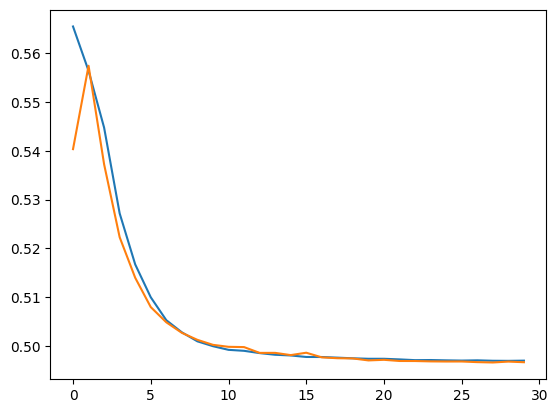

In [190]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

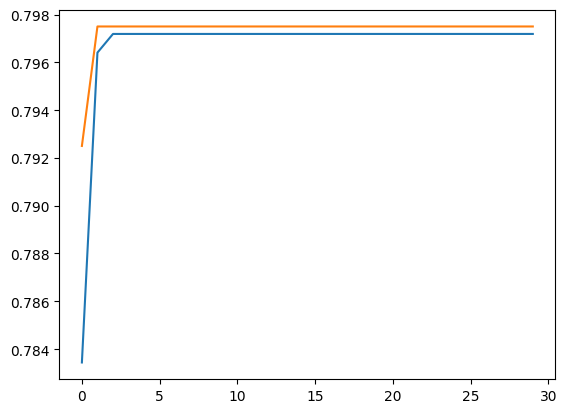

In [191]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])